In [1]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
from scipy import stats

In [2]:
sourceLow = '/home/richard/largeDataSet/ES_Run_modfileAug2015/Phchr2.ES_C_4.mod'

In [3]:
with open(sourceLow) as f:
    text = f.read()
    internal_distr = text.split('$EXON_DISTR')[1].split('$TERMINAL_DISTR')[0].rstrip().lstrip().split('\n')
    internal_distr = map(lambda x: x.split(), internal_distr)
    internal_distr = map(lambda x: (int(x[0]), float(x[1])), internal_distr)

shape = 1.3903825014, scale = 167.985069441


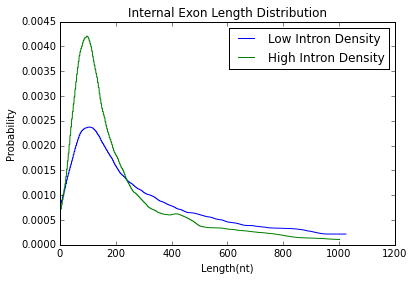

In [13]:
## get length distibution
table = pd.DataFrame(internal_distr, columns=['position','probability'])
table.sort_index(axis = 0, ascending = False, by = ['probability'], inplace = True)

probabilityAccumulation = 0.925
table['accProb'] = table.probability.cumsum()
idx  = table.accProb < probabilityAccumulation

table_sub = table[idx].copy()
table_sub.sort_index(axis = 0, by = ['position'], inplace = True)

## generate sample length for gamma to fit
size = 100000
counts = map(lambda n: int(round(n)),table_sub.probability*size)
table_sub['counts'] = counts

lengths = sc.parallelize(table_sub[['position','counts']].values).flatMap(lambda (a,b):[a]*b).collect()

## fit gamma distribution
shape,loc,scale = stats.gamma.fit(lengths)
print "shape = {}, scale = {}".format(shape,scale)

n = 1000

high_x = table_sub.position[:n]
high_y = table_sub.probability[:n]


####################################
sourceLow = '/home/richard/largeDataSet/ES_Run_modfileAug2015/Neucr2.ES_C_4.mod'
with open(sourceLow) as f:
    text = f.read()
    internal_distr = text.split('$EXON_DISTR')[1].split('$TERMINAL_DISTR')[0].rstrip().lstrip().split('\n')
    internal_distr = map(lambda x: x.split(), internal_distr)
    internal_distr = map(lambda x: (int(x[0]), float(x[1])), internal_distr)
## get length distibution
table = pd.DataFrame(internal_distr, columns=['position','probability'])
table.sort_index(axis = 0, ascending = False, by = ['probability'], inplace = True)

probabilityAccumulation = 0.85
table['accProb'] = table.probability.cumsum()
idx  = table.accProb < probabilityAccumulation

table_sub = table[idx].copy()
table_sub.sort_index(axis = 0, by = ['position'], inplace = True)

## generate sample length for gamma to fit
size = 100000
counts = map(lambda n: int(round(n)),table_sub.probability*size)
table_sub['counts'] = counts

lengths = sc.parallelize(table_sub[['position','counts']].values).flatMap(lambda (a,b):[a]*b).collect()

####################################
plt.plot(table_sub.position[:n],table_sub.probability[:n], label = 'Low Intron Density')
plt.plot(high_x,high_y, label = 'High Intron Density')
# plt.plot(range(n),stats.gamma.pdf(range(n),shape,loc,scale), 'r',label = 'Gamma Fitting')
plt.title('Internal Exon Length Distribution')
plt.xlabel('Length(nt)')
plt.ylabel('Probability')
plt.legend()
plt.show()